In [196]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()
from scipy.stats.distributions import chi2 
from math import sqrt

In [44]:
raw_data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^CRSLDX", start = "2006-06-30", end = "2022-11-02", 
                              interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [45]:
df_comp = raw_data.copy()

In [208]:
df_comp.shape

(4263, 9)

In [209]:
df.shape

(3410, 11)

In [46]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['nifty'] = df_comp['^CRSLDX'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [144]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [47]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^CRSLDX']
del df_comp['^FTSE']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [48]:
df_comp['market_value']=df_comp.nifty

In [49]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [50]:
df_comp

,spx,nifty,ftse,nikkei,market_value
,,,,,
Date,,,,,
2006-06-30,1270.199951,2562.500000,5833.399902,15505.179688,2562.500000
2006-07-03,1280.189941,2577.199951,5884.399902,15571.620117,2577.199951
2006-07-04,1280.189941,2574.100098,5883.500000,15638.500000,2574.100098
2006-07-05,1270.910034,2616.850098,5826.700195,15523.940430,2616.850098
2006-07-06,1274.079956,2591.800049,5890.000000,15321.400391,2591.800049
...,...,...,...,...,...
2022-10-26,3830.600098,15158.099609,7056.100098,27431.839844,15158.099609
2022-10-27,3807.300049,15244.250000,7073.700195,27345.240234,15244.250000


In [51]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [134]:
df_test=df_comp.iloc[size:]

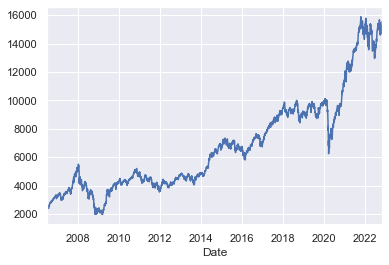

In [52]:
df_comp.nifty.plot()
plt.show()

In [60]:
wn=np.random.normal(loc=df.market_value.mean(),scale=df.market_value.std(),size=len(df))
df['wn']=wn
df.describe()

,spx,nifty,ftse,nikkei,market_value,wn
,,,,,,
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,1731.107328,5530.525398,6222.268416,14905.210127,5530.525398,5555.369678
std,576.042149,2114.458274,866.160500,4600.352310,2114.458274,2133.203713
min,676.530029,1966.849976,3512.100098,7054.979980,1966.849976,-927.575954
25%,1293.695038,4063.837524,5723.700195,10108.370117,4063.837524,4131.860467
50%,1530.334961,4692.974854,6276.099854,15308.135254,4692.974854,5540.817546
75%,2104.147461,7004.474976,6820.949951,18698.509766,7004.474976,6994.050952
max,3019.560059,9992.000000,7877.500000,24270.619141,9992.000000,12384.237412


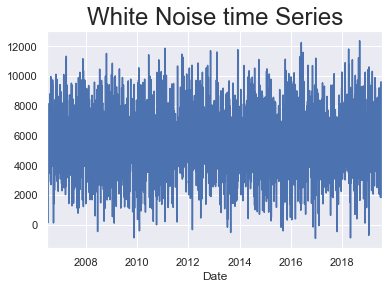

In [61]:
df.wn.plot()
plt.title("White Noise time Series",size=24)
plt.show()

In [210]:
import statsmodels.tsa.stattools as sts
A=sts.adfuller(df.market_value)
print('ADF statistic: %f' % A[0])
print('p-value: %f' % A[1])
print('Critical Value:')
for key, value in A[4].items():
    print('\t%s: %3f' % (key,value))

ADF statistic: -0.739773
p-value: 0.836177
Critical Value:
	1%: -3.432277
	5%: -2.862391
	10%: -2.567223


In [64]:
sts.adfuller(df.wn)

(-56.84556529743162,
 0.0,
 0,
 3409,
 {'1%': -3.432269692243993,
  '5%': -2.8623882092847923,
  '10%': -2.567221517745763},
 61418.98290059179)

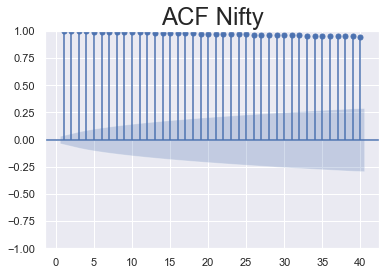

In [65]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title("ACF Nifty",size=24)
plt.show()

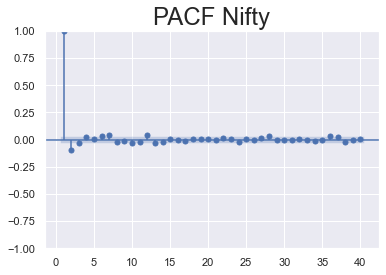

In [88]:
sgt.plot_pacf(df.market_value,lags=40,zero=False,method=('OLS'))
plt.title("PACF Nifty",size=24)
plt.show()

In [68]:
df['returns'] = df.market_value.pct_change(1)*100
df

,spx,nifty,ftse,nikkei,market_value,wn,returns
,,,,,,,
Date,,,,,,,
2006-06-30,1270.199951,2562.500000,5833.399902,15505.179688,2562.500000,5763.035490,NaN
2006-07-03,1280.189941,2577.199951,5884.399902,15571.620117,2577.199951,2186.787558,0.573657
2006-07-04,1280.189941,2574.100098,5883.500000,15638.500000,2574.100098,4493.363820,-0.120280
2006-07-05,1270.910034,2616.850098,5826.700195,15523.940430,2616.850098,4873.535755,1.660775
2006-07-06,1274.079956,2591.800049,5890.000000,15321.400391,2591.800049,5501.607284,-0.957260
...,...,...,...,...,...,...,...
2019-07-19,2976.610107,9304.650391,7508.700195,21466.990234,9304.650391,2348.311353,-1.602132
2019-07-22,2985.030029,9247.750000,7514.899902,21416.789062,9247.750000,8913.494762,-0.611526


In [201]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

# ARIMA (1,1,1)



In [71]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df.market_value, order=(1,1,1))
results_arima = model_arima.fit()
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 3410
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18737.682
Date:                Wed, 16 Nov 2022   AIC                          37481.365
Time:                        10:51:45   BIC                          37499.768
Sample:                    06-30-2006   HQIC                         37487.941
                         - 07-25-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2926      0.116      2.522      0.012       0.065       0.520
ma.L1         -0.2010      0.121     -1.666      0.096      -0.437       0.036
sigma2      3484.7054     45.406     76.746      0.000    3395.712    3573.699
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              3874.80
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.35
Prob(H) (two-sided):                  0.16   Kurtosis:                         8.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residual ARIMA (1,1,1)

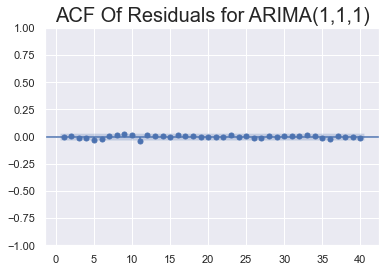

In [73]:
df['res_arima'] = results_arima.resid
sgt.plot_acf(df.res_arima, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

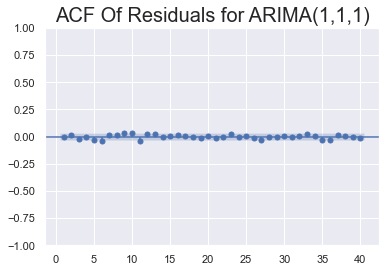

In [74]:
df['res_arima'] = results_arima.resid.iloc[:]
sgt.plot_acf(df.res_arima[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)",size=20)
plt.show()

## Higher Lag Arima model

In [78]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()

In [80]:
print("ARIMA(1,1,1):  \t LL = ", results_arima.llf, "\t AIC = ", results_arima.aic)
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -18737.68249909828 	 AIC =  37481.36499819656
ARIMA(1,1,2):  	 LL =  -18736.19323804506 	 AIC =  37480.38647609012
ARIMA(1,1,3):  	 LL =  -18735.565544913443 	 AIC =  37481.131089826886
ARIMA(2,1,1):  	 LL =  -18736.32557039336 	 AIC =  37480.65114078672
ARIMA(3,1,1):  	 LL =  -18735.07739340101 	 AIC =  37480.15478680202
ARIMA(3,1,2):  	 LL =  -18731.596493842655 	 AIC =  37475.19298768531


In [81]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(df.market_value, order=(3,1,2))
results_arima = model_arima.fit()
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 3410
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -18731.596
Date:                Wed, 16 Nov 2022   AIC                          37475.193
Time:                        11:21:29   BIC                          37511.998
Sample:                    06-30-2006   HQIC                         37488.346
                         - 07-25-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2586      0.069     18.303      0.000       1.124       1.393
ar.L2         -0.8960      0.073    -12.270      0.000      -1.039      -0.753
ar.L3          0.0391      0.016      2.460      0.014       0.008       0.070
ma.L1         -1.1712      0.068    -17.210      0.000      -1.305      -1.038
ma.L2          0.8233      0.065     12.758      0.000       0.697       0.950
sigma2      3474.6993     46.242     75.141      0.000    3384.066    3565.332
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3750.03
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_3_i_1_ma_1, model_ar_3_i_1_ma_2)))


LLR test p-value = 0.008


In [205]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_3_i_1_ma_2, DF = 2)))


LLR test p-value = 0.01


In [104]:
df['delta_prices']=df.market_value.diff(1)

In [106]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(3,0,2))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 3409
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -18730.053
Date:                Wed, 16 Nov 2022   AIC                          37474.107
Time:                        12:00:00   BIC                          37517.046
Sample:                    07-03-2006   HQIC                         37489.452
                         - 07-25-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9359      1.147      1.688      0.091      -0.312       4.184
ar.L1          1.2579      0.070     18.085      0.000       1.122       1.394
ar.L2         -0.8925      0.073    -12.148      0.000      -1.037      -0.749
ar.L3          0.0377      0.016      2.356      0.018       0.006       0.069
ma.L1         -1.1715      0.069    -16.987      0.000      -1.307      -1.036
ma.L2          0.8209      0.065     12.630      0.000       0.694       0.948
sigma2      3470.8519     46.353     74.878      0.000    3380.001    3561.703
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3754.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

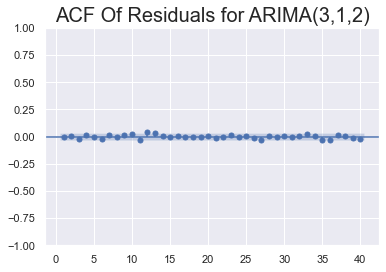

In [87]:
df['res_ar_3_i_1_ma_2'] = results_ar_3_i_1_ma_2.resid
sgt.plot_acf(df.res_ar_3_i_1_ma_2[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(3,1,2)", size=20)
plt.show()

## Creating Returns and Applying Auto Arima

In [90]:
from pmdarima.arima import auto_arima

In [107]:
model_auto = auto_arima(df.market_value[1:])

In [108]:
model_auto

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [109]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3409
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -18725.036
Date:                Wed, 16 Nov 2022   AIC                          37464.071
Time:                        12:05:23   BIC                          37507.008
Sample:                    07-03-2006   HQIC                         37479.416
                         - 07-25-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1547      0.697      1.656      0.098      -0.212       2.522
ar.L1          1.2583      0.070     18.090      0.000       1.122       1.395
ar.L2         -0.8926      0.073    -12.154      0.000      -1.037      -0.749
ar.L3          0.0377      0.016      2.356      0.018       0.006       0.069
ma.L1         -1.1718      0.069    -16.993      0.000      -1.307      -1.037
ma.L2          0.8209      0.065     12.634      0.000       0.694       0.948
sigma2      3469.5241     46.317     74.908      0.000    3378.744    3560.305
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3749.83
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.11   Kurtosis:                         8.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
model_auto = auto_arima(df.returns[1:], exogenous = df_comp[['ret_spx', 'ret_ftse', 'ret_nikkei']][1:], m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct', information_criterion = 'oob',
                       out_of_sample = int(len(df_comp)*0.2))

In [103]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 3409
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 5)   Log Likelihood               -5710.634
Date:                           Wed, 16 Nov 2022   AIC                          11435.268
Time:                                   11:55:34   BIC                          11478.207
Sample:                               07-03-2006   HQIC                         11450.613
                                    - 07-25-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0582      0.037      1.563      0.118      -0.015       0.131
drift       -1.04e-05   2.66e-05     -0.391      0.696   -6.25e-05    4.17e-05
ar.L1          0.0729      0.011      6.894      0.000       0.052       0.094
ar.L2          0.0343      0.010      3.365      0.001       0.014       0.054
ar.S.L5       -0.0386      0.010     -3.768      0.000      -0.059      -0.019
ar.S.L10       0.0450      0.011      4.198      0.000       0.024       0.066
sigma2         1.6759      0.017     97.673      0.000       1.642       1.710
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20646.01
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## The Simple GARCH Model

In [110]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 5100.5463708130865
Iteration:     10,   Func. Count:     65,   Neg. LLF: 5068.358320467241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5068.358300536791
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5068.36
Distribution:                  Normal   AIC:                           10144.7
Method:            Maximum Likelihood   BIC:                           10169.3
                                        No. Observations:                 3409
Date:                Wed, Nov 16 2022   Df Residuals:                     3408
Time:                        12:11:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0717  1.688e-02      4.248  2.153e-05 [3.862e-02,  0.105]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0171  6.805e-03      2.511  1.205e-02 [3.748e-03,3.042e-02]
alpha[1]       0.0887  1.589e-02      5.583  2.370e-08   [5.755e-02,  0.120]
beta[1]        0.9030  1.680e-02     53.763      0.000     [  0.870,  0.936]
============================================================================

Covariance estimator: robust
"""

## Higher GARCH Model

In [111]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 5071.991824645368
Iteration:     10,   Func. Count:     74,   Neg. LLF: 5068.358339526227
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5068.358300534756
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5068.36
Distribution:                  Normal   AIC:                           10146.7
Method:            Maximum Likelihood   BIC:                           10177.4
                                        No. Observations:                 3409
Date:                Wed, Nov 16 2022   Df Residuals:                     3408
Time:                        12:13:30   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0717  1.689e-02      4.244  2.194e-05 [3.859e-02,  0.105]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0171  8.235e-03      2.075  3.799e-02 [9.467e-04,3.323e-02]
alpha[1]       0.0887  3.535e-02      2.509  1.212e-02   [1.939e-02,  0.158]
beta[1]        0.9030      0.446      2.025  4.287e-02   [2.901e-02,  1.777]
beta[2]    1.8686e-14      0.412  4.530e-14      1.000     [ -0.808,  0.808]
============================================================================

Covariance estimator: robust
"""

In [112]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 5074.46501693939
Iteration:     10,   Func. Count:     84,   Neg. LLF: 5068.5732327463775
Iteration:     15,   Func. Count:    118,   Neg. LLF: 5068.358300622303
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5068.358300554028
            Iterations: 15
            Function evaluations: 118
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5068.36
Distribution:                  Normal   AIC:                           10148.7
Method:            Maximum Likelihood   BIC:                           10185.5
                                        No. Observations:                 3409
Date:                Wed, Nov 16 2022   Df Residuals:                     3408
Time:                        12:13:52   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0717  1.693e-02      4.234  2.299e-05 [3.850e-02,  0.105]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0171  8.273e-03      2.065  3.889e-02 [8.721e-04,3.330e-02]
alpha[1]       0.0887  3.575e-02      2.481  1.312e-02   [1.861e-02,  0.159]
beta[1]        0.9030      0.541      1.670  9.489e-02     [ -0.157,  1.963]
beta[2]        0.0000      0.683      0.000      1.000     [ -1.339,  1.339]
beta[3]    8.6527e-15      0.241  3.592e-14      1.000     [ -0.472,  0.472]
============================================================================

Covariance estimator: robust
"""

In [113]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 5071.708708179167
Iteration:     10,   Func. Count:     85,   Neg. LLF: 5073.616796088361
Iteration:     15,   Func. Count:    125,   Neg. LLF: 5068.210910847842
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5068.2109005435705
            Iterations: 17
            Function evaluations: 138
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5068.21
Distribution:                  Normal   AIC:                           10148.4
Method:            Maximum Likelihood   BIC:                           10185.2
                                        No. Observations:                 3409
Date:                Wed, Nov 16 2022   Df Residuals:                     3408
Time:                        12:14:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0714  1.698e-02      4.202  2.643e-05 [3.808e-02,  0.105]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0179  7.675e-03      2.336  1.950e-02  [2.885e-03,3.297e-02]
alpha[1]       0.0799  3.505e-02      2.281  2.257e-02    [1.124e-02,  0.149]
alpha[2]       0.0104  4.375e-02      0.237      0.812 [-7.536e-02,9.613e-02]
alpha[3]   1.8902e-03  3.259e-02  5.800e-02      0.954 [-6.199e-02,6.577e-02]
beta[1]        0.8991  2.203e-02     40.816      0.000      [  0.856,  0.942]
=============================================================================

Covariance estimator: robust
"""

## Forecasting

In [120]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1).mul(100)

In [122]:
model_ar = ARIMA(df.nifty, order = (3,1,2))
results_ar = model_ar.fit()

In [148]:
df_comp.tail()

,spx,nifty,ftse,nikkei,market_value,ret_spx,ret_ftse,ret_nikkei,ret_nifty
,,,,,,,,,
Date,,,,,,,,,
2022-10-26,3830.600098,15158.099609,7056.100098,27431.839844,15158.099609,-0.738772,0.607401,0.666270,0.000000
2022-10-27,3807.300049,15244.250000,7073.700195,27345.240234,15244.250000,-0.608261,0.249431,-0.315690,0.568346
2022-10-28,3901.060059,15241.599609,7047.700195,27105.199219,15241.599609,2.462638,-0.367559,-0.877816,-0.017386
2022-10-31,3871.979980,15424.000000,7094.500000,27587.460938,15424.000000,-0.745440,0.664044,1.779222,1.196727
2022-11-01,3856.100098,15537.400391,7186.200195,27678.919922,15537.400391,-0.410123,1.292553,0.331524,0.735220


In [149]:
df.tail()

,spx,nifty,ftse,nikkei,market_value,wn,returns,res_arima,res_ar_1_i_1_ma_3,res_ar_3_i_1_ma_2,delta_prices
,,,,,,,,,,,
Date,,,,,,,,,,,
2019-07-19,2976.610107,9304.650391,7508.700195,21466.990234,9304.650391,2348.311353,-1.602132,-143.988132,-142.692622,-138.408898,-151.500000
2019-07-22,2985.030029,9247.750000,7514.899902,21416.789062,9247.750000,8913.494762,-0.611526,-41.501688,-39.767934,-39.416731,-56.900391
2019-07-23,3005.469971,9233.549805,7556.899902,21620.880859,9233.549805,3872.493159,-0.153553,-5.889068,-6.211605,-7.123151,-14.200195
2019-07-24,3019.560059,9160.450195,7501.500000,21709.570312,9160.450195,9064.538197,-0.791674,-70.127492,-74.555210,-76.170221,-73.099609
2019-07-25,3003.669922,9159.150391,7489.100098,21756.550781,9159.150391,6424.634049,-0.014189,5.999043,2.511119,-3.139897,-1.299805


In [154]:
df_test

,spx,nifty,ftse,nikkei,market_value,ret_spx,ret_ftse,ret_nikkei,ret_nifty
,,,,,,,,,
Date,,,,,,,,,
2019-07-26,3025.860107,9192.599609,7549.100098,21658.150391,9192.599609,0.738769,0.801164,-0.452279,0.365200
2019-07-29,3020.969971,9108.900391,7686.600098,21616.800781,9108.900391,-0.161611,1.821409,-0.190919,-0.910507
2019-07-30,3013.179932,9004.049805,7646.799805,21709.310547,9004.049805,-0.257865,-0.517788,0.427953,-1.151078
2019-07-31,2980.379883,9044.950195,7586.799805,21521.529297,9044.950195,-1.088553,-0.784642,-0.864980,0.454244
2019-08-01,2953.560059,8935.750000,7584.899902,21540.990234,8935.750000,-0.899879,-0.025042,0.090425,-1.207306
...,...,...,...,...,...,...,...,...,...
2022-10-26,3830.600098,15158.099609,7056.100098,27431.839844,15158.099609,-0.738772,0.607401,0.666270,0.000000
2022-10-27,3807.300049,15244.250000,7073.700195,27345.240234,15244.250000,-0.608261,0.249431,-0.315690,0.568346


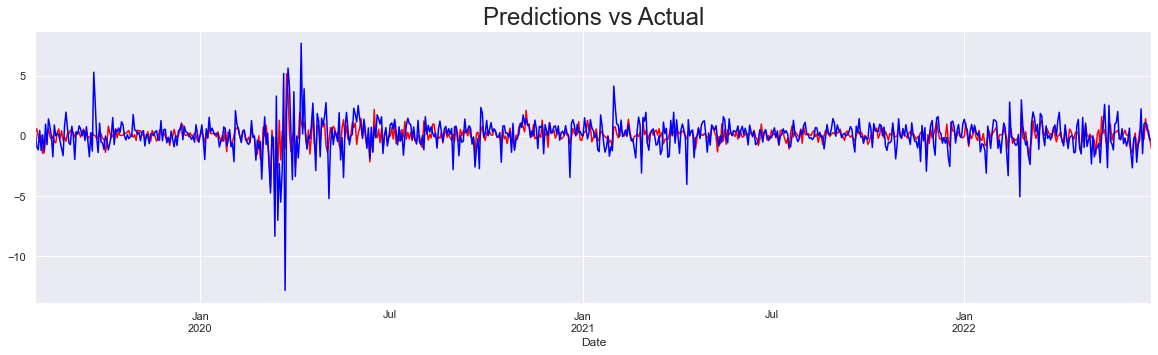

In [188]:
start_date="2019-07-26"
end_date="2022-06-30"
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_ret_sarimax = SARIMAX(df_comp.ret_nifty[1:], exog = df_comp[["ret_spx","ret_ftse","ret_nikkei"]][1:],
                            order = (3,1,2), seasonal_order = (3,0,2,5))
results_ret_sarimax = model_ret_sarimax.fit()

df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                             exog = df_test[["ret_spx","ret_ftse","ret_nikkei"]][start_date:end_date]) 

df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_nifty[start_date:end_date].plot(color = "blue")
plt.title("Predictions vs Actual", size = 24)
plt.show()

In [189]:
model_auto = auto_arima(df_comp.ret_nifty[1:], exogenous = df_comp[['ret_spx', 'ret_ftse', 'ret_nikkei']][1:],
                       m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)

In [192]:
start_date="2021-06-30"
end_date="2022-06-30"
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_spx', 'ret_ftse', 'ret_nikkei']][start_date:end_date]),
                            index = df_test.index)

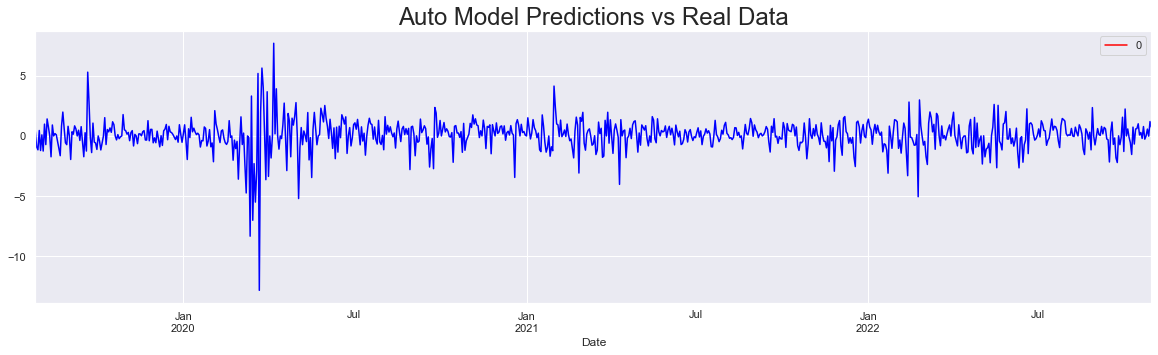

In [193]:
df_auto_pred.plot(figsize = (20,5), color = "red")
df_test.ret_nifty.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

## Forecasting Volatility

In [185]:
mod_garch = arch_model(df_comp.ret_nifty[1:], vol = "GARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
res_garch = mod_garch.fit(last_obs = start_date, update_freq = 10)

Iteration:     10,   Func. Count:     65,   Neg. LLF: 5043.638376093033
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5043.638366916015
            Iterations: 12
            Function evaluations: 74
            Gradient evaluations: 12


In [186]:
pred_garch = res_garch.forecast(horizon = 1, align = 'target')

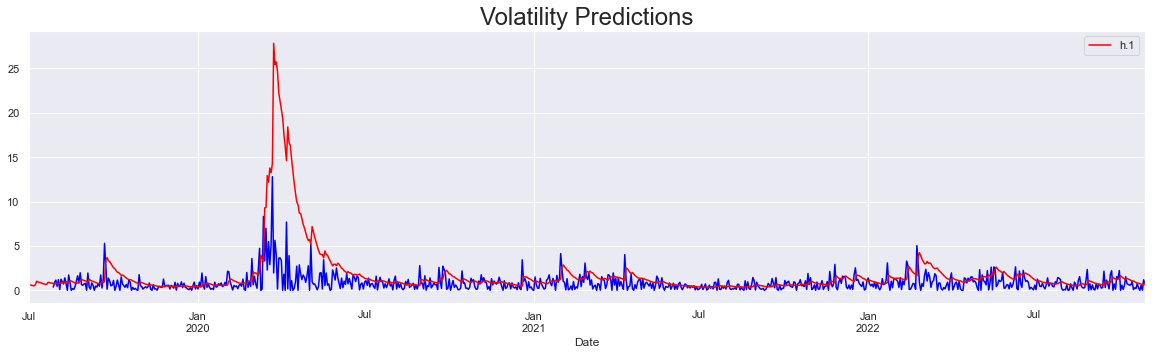

In [187]:
pred_garch.residual_variance[start_date:].plot(figsize = (20,5), color = "red", zorder = 2)
df_test.ret_nifty.abs().plot(color = "blue", zorder = 1)
plt.title("Volatility Predictions", size = 24)
plt.show()